# Data Visualization: Understanding Patterns in Data

Data visualization is a powerful tool for exploring and presenting data. It helps:
- Identify trends, patterns, and correlations.
- Summarize large datasets visually.
- Communicate findings effectively to others.

This notebook demonstrates key data visualization techniques, including scatter plots, line plots, histograms, box plots, and more, to analyze salary data based on years of experience.


In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import data
salary = pd.read_csv('Data.csv')
salary.head()

,Experience Years,Salary
0,9.5,97602
1,4.0,30165
2,2.0,13261
3,3.2,40174
4,5.1,61360


In [2]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  500 non-null    float64
 1   Salary            500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [3]:
salary.describe()

,Experience Years,Salary
count,500.000000,500.000000
mean,5.794000,60584.880000
std,2.841287,30265.178349
min,1.000000,4155.000000
25%,3.300000,35201.750000
50%,5.900000,62029.000000
75%,8.200000,86735.500000
max,10.500000,122031.000000


## Scatter Plot - Experience vs. Salary

Scatter plots are used to visualize the relationship between two continuous variables. 
### Key Points:
- **Purpose**: Understand if salary increases with years of experience.
- **Insights**: Clusters, trends, or outliers can indicate interesting patterns or relationships.


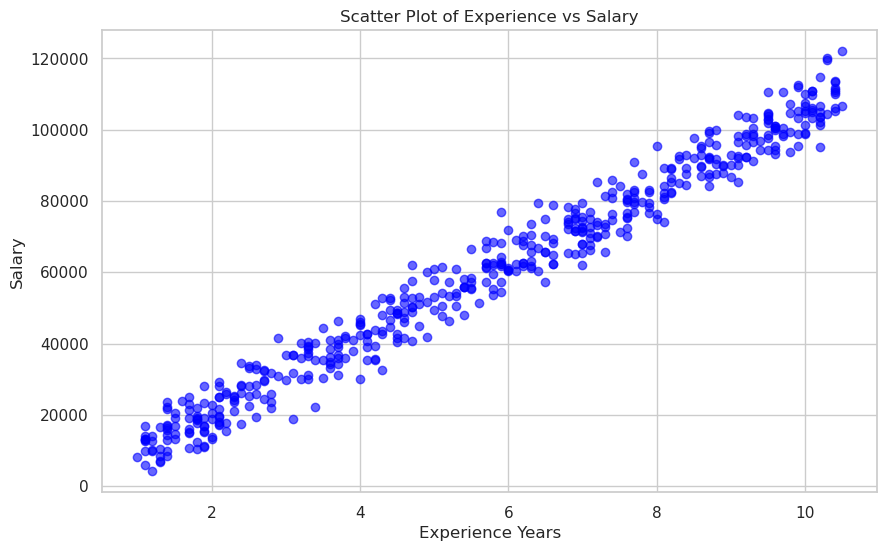

In [4]:
# Set style for plots
sns.set(style="whitegrid")

# 1. Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(salary['Experience Years'], salary['Salary'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Experience vs Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()



## Line Plot - Mean Salary by Experience

Line plots show trends in the data over time or across categories.
### Key Points:
- **Purpose**: Track the average salary for each experience level.
- **Insights**: Smoother trends highlight general patterns while filtering individual variability.


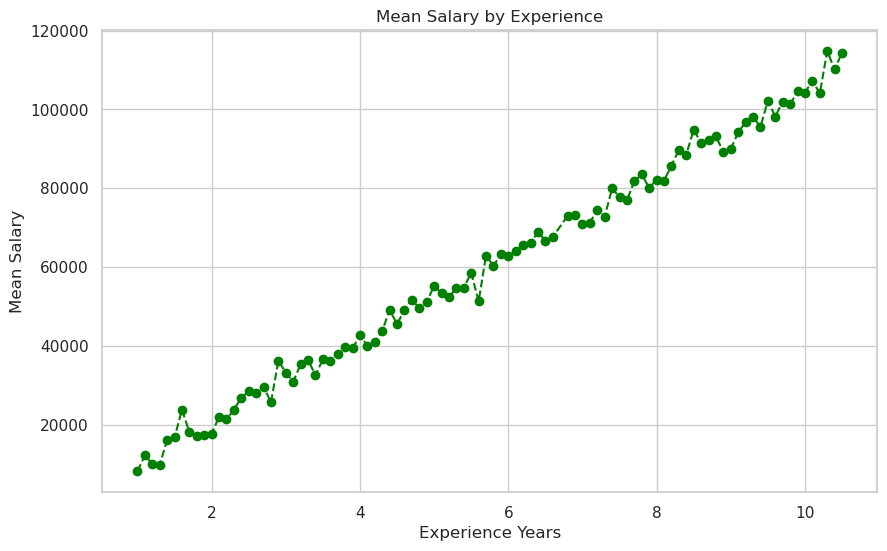

In [5]:

#Line Plot (Mean Salary by Experience Year)
mean_salary = salary.groupby('Experience Years')['Salary'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_salary.index, mean_salary.values, color='green', marker='o', linestyle='--')
plt.title('Mean Salary by Experience')
plt.xlabel('Experience Years')
plt.ylabel('Mean Salary')
plt.show()


## Histogram - Salary Distribution

Histograms summarize the frequency of data points in different ranges.
### Key Points:
- **Purpose**: Understand how salaries are distributed.
- **Insights**: Detect common salary ranges, outliers, and skewness in the data.


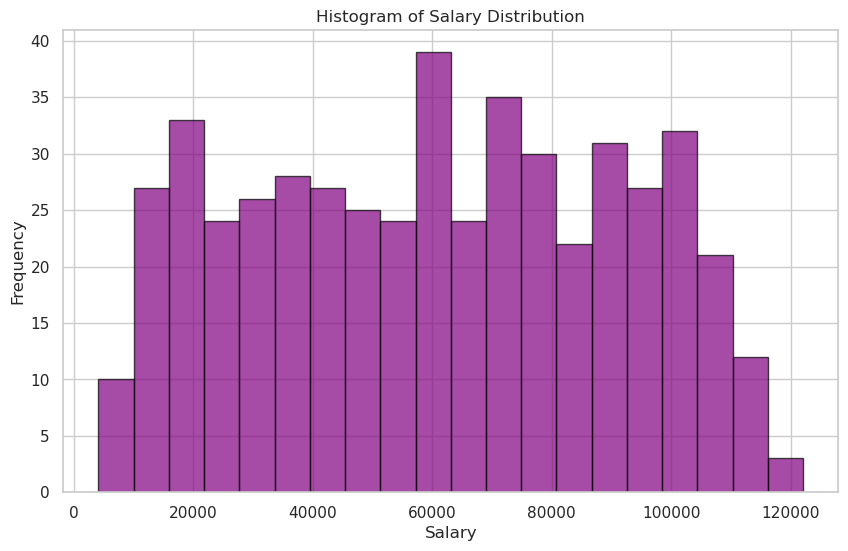

In [6]:

#Histogram (Salary Distribution)
plt.figure(figsize=(10, 6))
plt.hist(salary['Salary'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


## Box Plot and Violin Plot - Experience vs. Salary

Box plots and violin plots show data distribution for different categories.
### Key Points:
- **Box Plot**: Highlights median, quartiles, and outliers.
- **Violin Plot**: Combines box plot with a density estimate to show distribution.


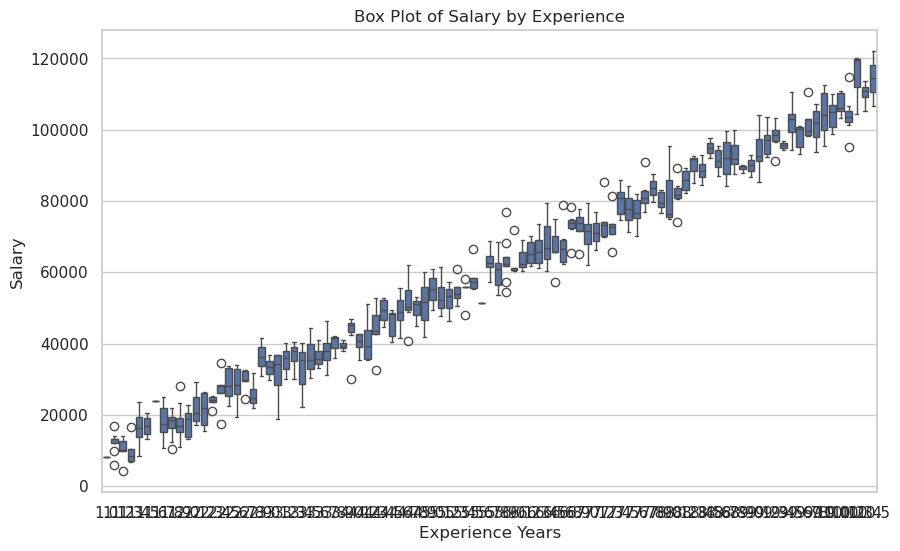

In [8]:

#Box Plot (Experience vs Salary)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience Years', y='Salary', data=salary)
plt.title('Box Plot of Salary by Experience')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()


## Density Plot - Salary Distribution

Density plots visualize the distribution of a variable more smoothly than histograms.
### Key Points:
- **Purpose**: Provide a smooth estimate of the salary distribution.
- **Insights**: Highlights where most data points are concentrated.


/tmp/ipykernel_9116/2885278341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salary['Salary'], color='red', shade=True)


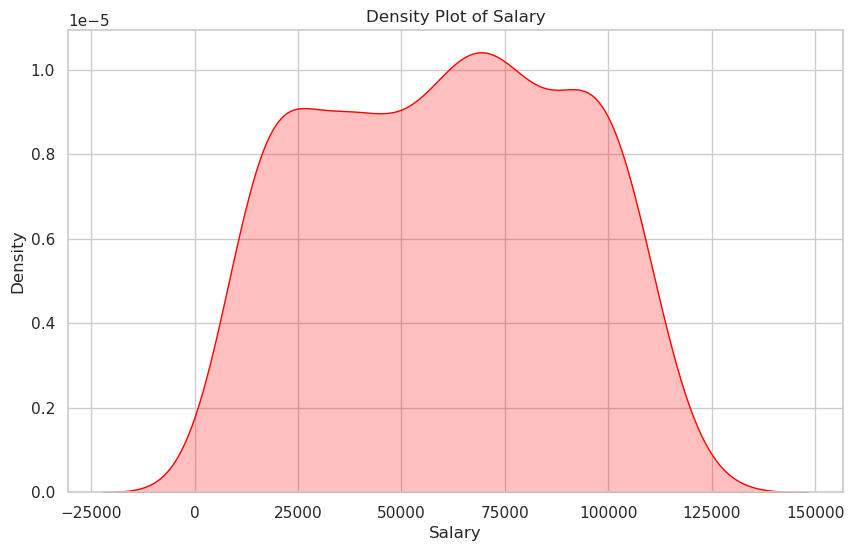

In [9]:

#Density Plot (Salary Distribution)
plt.figure(figsize=(10, 6))
sns.kdeplot(salary['Salary'], color='red', shade=True)
plt.title('Density Plot of Salary')
plt.xlabel('Salary')
plt.show()


## Bar Plot - Mean Salary for Binned Experience Ranges

Bar plots summarize aggregated values for categorical groups.
### Key Points:
- **Purpose**: Show mean salary for grouped experience ranges.
- **Insights**: Compare salary trends across broader experience categories.


/tmp/ipykernel_9116/3691059252.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary_binned = salary.groupby('Experience Binned')['Salary'].mean()


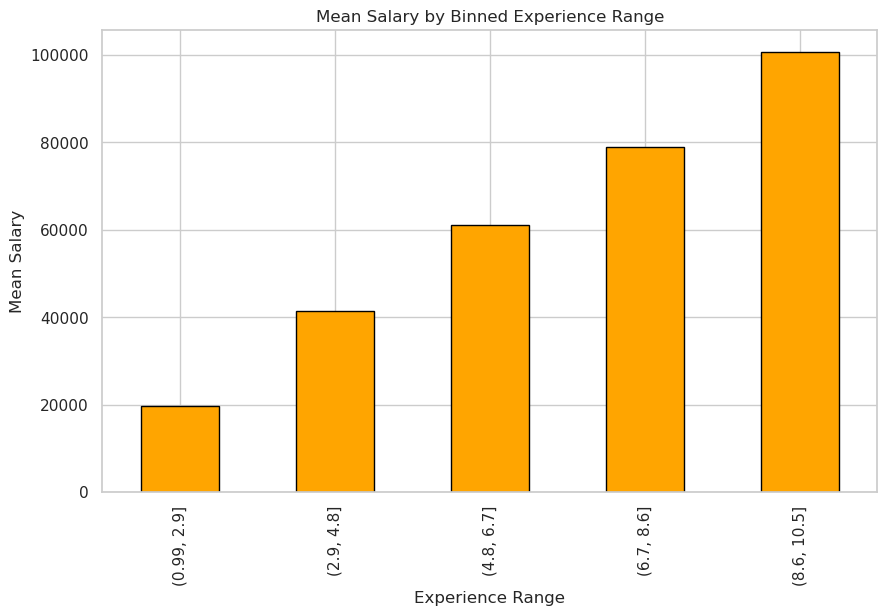

In [10]:
#Bar Plot (Mean Salary for Binned Experience Ranges)
salary['Experience Binned'] = pd.cut(salary['Experience Years'], bins=5)
mean_salary_binned = salary.groupby('Experience Binned')['Salary'].mean()
plt.figure(figsize=(10, 6))
mean_salary_binned.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Mean Salary by Binned Experience Range')
plt.xlabel('Experience Range')
plt.ylabel('Mean Salary')
plt.show()

## Heatmap - Salary by Experience and Salary Ranges

Heatmaps visualize the relationship between two categorical variables by displaying frequencies or aggregated values.
### Key Points:
- **Purpose**: Show how salary and experience ranges interact.
- **Insights**: Highlight combinations with the highest occurrences.


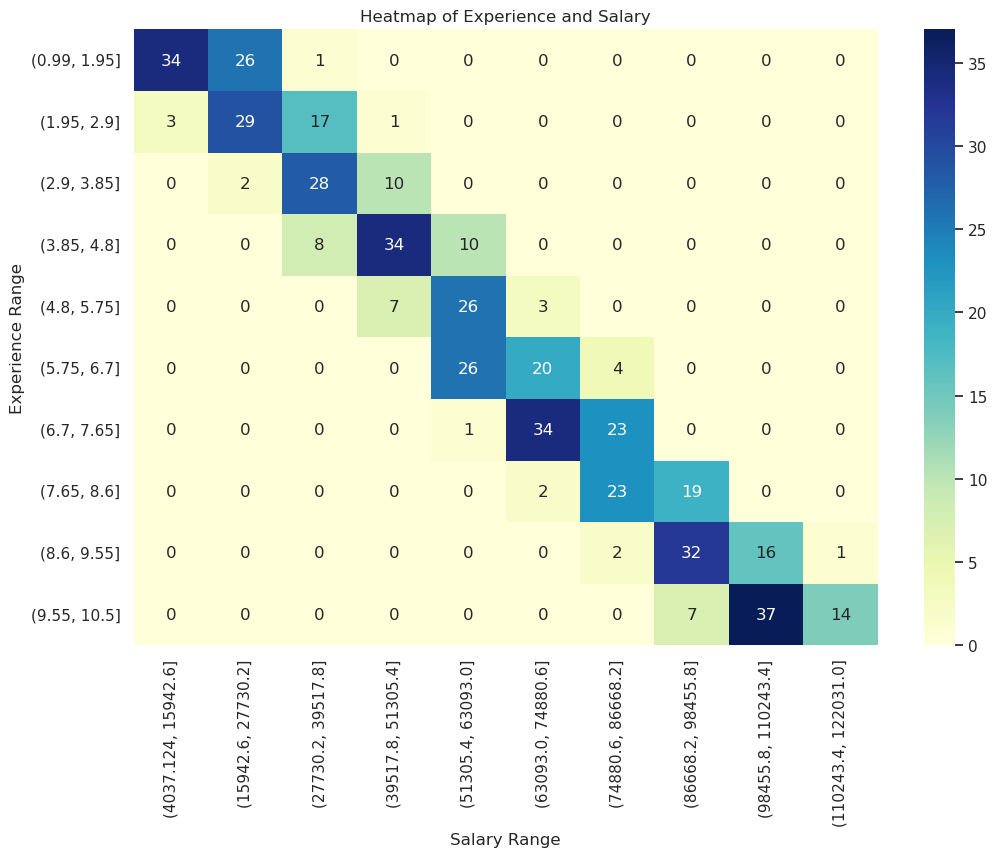

In [11]:
#define target (y) and features (X)
#Heatmap (Salary by Binned Experience and Salary Ranges)
experience_bins = pd.cut(salary['Experience Years'], bins=10)
salary_bins = pd.cut(salary['Salary'], bins=10)
heatmap_salary = pd.crosstab(experience_bins, salary_bins)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_salary, cmap="YlGnBu", annot=True, fmt="d", cbar=True)
plt.title('Heatmap of Experience and Salary')
plt.xlabel('Salary Range')
plt.ylabel('Experience Range')
plt.show()

## Pair Plot - Exploring Pairwise Relationships

Pair plots visualize relationships between all numerical variables in the dataset.
### Key Points:
- **Purpose**: Analyze pairwise correlations and distributions.
- **Insights**: Detect linear or non-linear relationships, clusters, and outliers.
- **When to Use**: Suitable when you have multiple numerical features to compare.


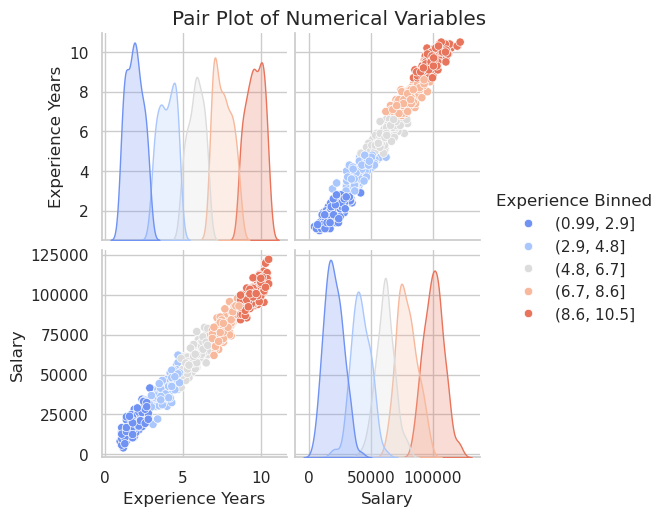

In [12]:
# Pair Plot
sns.pairplot(salary, vars=['Experience Years', 'Salary'], diag_kind='kde', hue='Experience Binned', palette='coolwarm')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

## Regression Plot - Adding Trend Lines to Scatter Plot

Regression plots add a trend line to scatter plots, showing the best-fit relationship between variables.
### Key Points:
- **Purpose**: Highlight trends and quantify relationships.
- **Insights**: Understand if the relationship is linear or more complex.
- **When to Use**: Useful for investigating correlations.


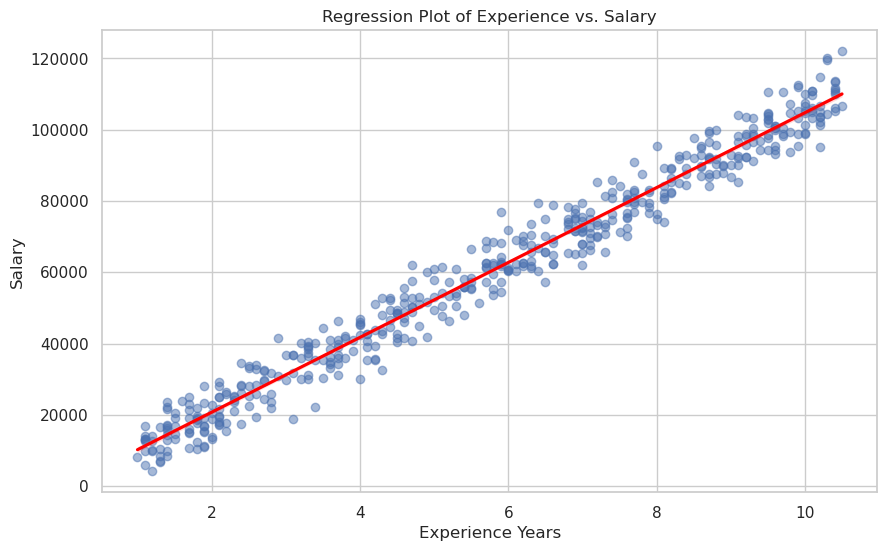

In [13]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Experience Years', y='Salary', data=salary, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot of Experience vs. Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()


## 3D Plot - Experience vs. Salary vs. Index

A 3D plot can help visualize the relationship between multiple variables. In this case, we’ll plot `Experience Years`, `Salary`, and an index to show how they relate in three dimensions.
### Key Points:
- **Purpose**: Visualize the relationship between three variables.
- **Insights**: Understand the spatial distribution of data points across multiple dimensions.


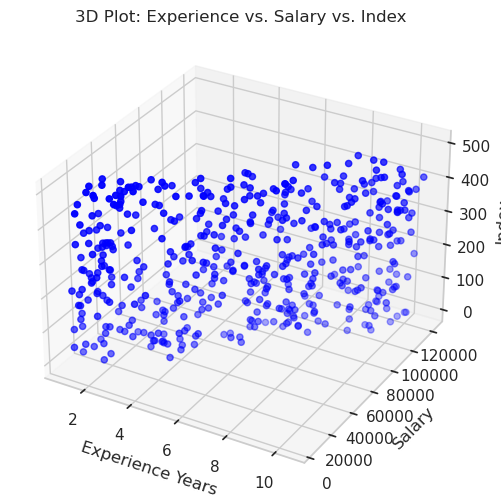

In [20]:
# Import necessary libraries for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create index for plotting
salary['Index'] = range(len(salary))

# 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(salary['Experience Years'], salary['Salary'], salary['Index'], color='blue')

ax.set_xlabel('Experience Years')
ax.set_ylabel('Salary')
ax.set_zlabel('Index')
plt.title('3D Plot: Experience vs. Salary vs. Index')
plt.show()


## Bubble Chart - Experience vs. Salary with Bubble Size

A bubble chart is a variation of the scatter plot where each point is represented as a bubble, and the size of the bubble can represent a third variable. In this case, we will use `Experience Years` and `Salary` and make the bubble size proportional to the `Salary`.
### Key Points:
- **Purpose**: Add a third dimension to the scatter plot, showing the magnitude of values.
- **Insights**: Visualize how the relationship changes with additional dimensions.


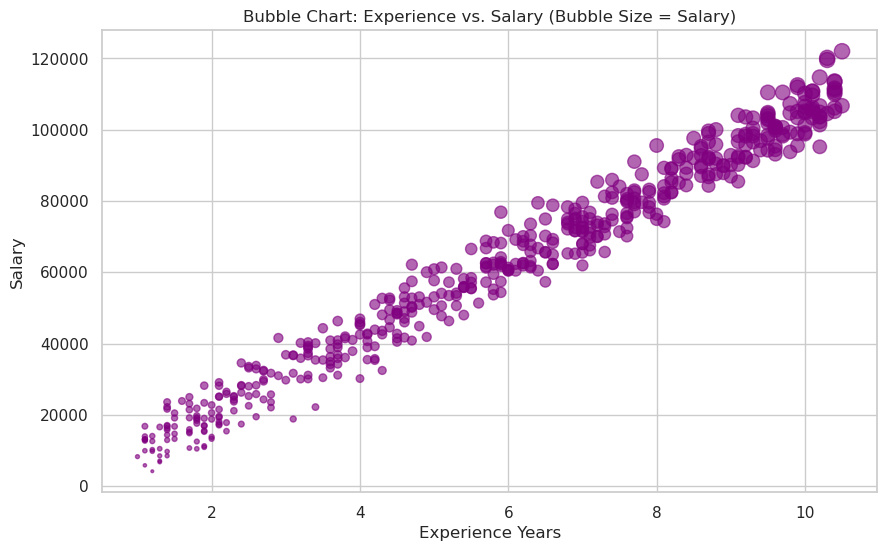

In [22]:
# Bubble chart (using Salary as bubble size)
plt.figure(figsize=(10, 6))
plt.scatter(salary['Experience Years'], salary['Salary'], s=salary['Salary']/1000, alpha=0.6, color='purple')
plt.title('Bubble Chart: Experience vs. Salary (Bubble Size = Salary)')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()
